In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pl as plt
import sqlite3
import statsmodels.formula.api as smf

try: 
    import yfinance as yf
except:
    !pip install yfinance
    import yfinance as yf

#from regtabletotext import prettify_result
#!pip install -r "requirements.txt"

In [2]:
prices = (yf.download(tickers="AAPL", 
                      start="2000-01-01", 
                      end="2022-12-31")
  .reset_index()
  .assign(symbol = "AAPL")
  .rename(columns = {"Date": "date", 
                     "Open": "open", 
                     "High": "high",
                     "Low": "low",
                     "Close": "close", 
                     "Adj Close": "adjusted", 
                     "Volume": "volume"
                    })
)

[*********************100%%**********************]  1 of 1 completed


In [3]:
prices.head().round(3)

,date,open,high,low,close,adjusted,volume,symbol
0,2000-01-03,0.936,1.004,0.908,0.999,0.847,535796800,AAPL
1,2000-01-04,0.967,0.988,0.903,0.915,0.776,512377600,AAPL
2,2000-01-05,0.926,0.987,0.920,0.929,0.787,778321600,AAPL
3,2000-01-06,0.948,0.955,0.848,0.848,0.719,767972800,AAPL
4,2000-01-07,0.862,0.902,0.853,0.888,0.753,460734400,AAPL


In [11]:
returns = (prices
  .sort_values("date")
  .assign(ret = lambda x: x["adjusted"].pct_change())
  .get(["symbol", "date", "ret"])
)
returns = returns.dropna()
returns.head().round(3)

,symbol,date,ret
1,AAPL,2000-01-04,-0.084
2,AAPL,2000-01-05,0.015
3,AAPL,2000-01-06,-0.087
4,AAPL,2000-01-07,0.047
5,AAPL,2000-01-10,-0.018


<Axes: xlabel='date', ylabel='ret'>

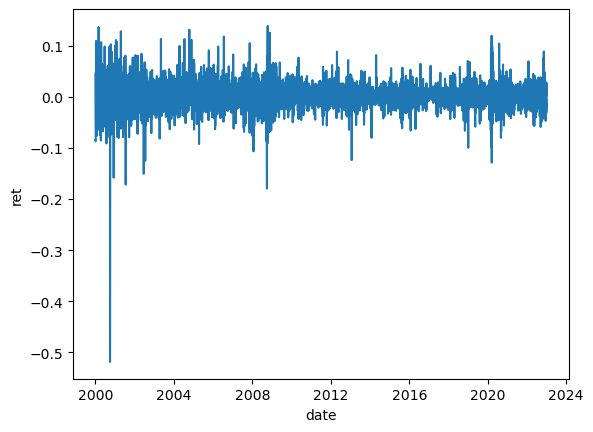

In [12]:
sns.lineplot(returns, x = "date", y = "ret")

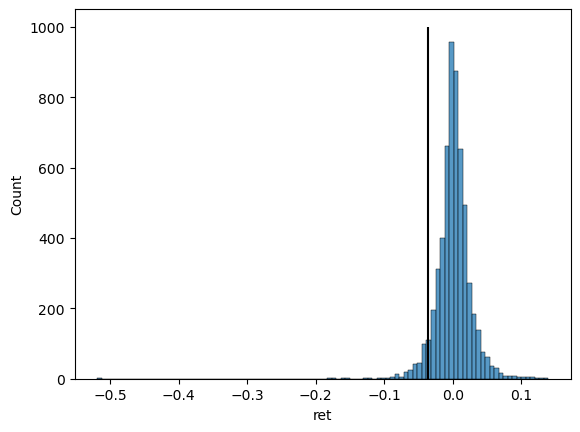

In [31]:
quantile_05 = returns["ret"].quantile(0.05)
sns.histplot(returns, x = "ret", bins=100)
plt.vlines(x = quantile_05, ymin = 0, ymax = 1000, color = "black")

In [32]:
returns["ret"].describe().round(3)

count    5786.000
mean        0.001
std         0.025
min        -0.519
25%        -0.010
50%         0.001
75%         0.013
max         0.139
Name: ret, dtype: float64

In [33]:
round(returns["ret"].max() * 100, 3)

13.905

In [35]:
returns.groupby(returns["date"].dt.year).describe()

ret                                                              \
      count      mean       std       min       25%       50%       75%   
date                                                                      
2000  251.0 -0.003457  0.054940 -0.518692 -0.034425 -0.001701  0.027154   
2001  248.0  0.002329  0.039338 -0.171713 -0.022873 -0.001162  0.026942   
2002  252.0 -0.001212  0.030526 -0.150372 -0.018749 -0.002786  0.017930   
2003  252.0  0.001857  0.023360 -0.081420 -0.012068  0.001549  0.014642   
2004  252.0  0.004702  0.025470 -0.055785 -0.009004  0.002835  0.015525   
2005  252.0  0.003490  0.024478 -0.092106 -0.010068  0.003440  0.016910   
2006  251.0  0.000949  0.024265 -0.063327 -0.014082 -0.001525  0.014303   
2007  251.0  0.003664  0.023757 -0.070206 -0.008942  0.002557  0.017957   
2008  253.0 -0.002646  0.036666 -0.179195 -0.023983 -0.001043  0.018686   
2009  252.0  0.003819  0.021369 -0.050164 -0.008984  0.002112  0.015498   
2010  252.0  0.001832  0.016856 -0.049598 -0.006217  0.002331  0.011378   
2011  252.0  0.001040  0.016539 -0.055940 -0.009266  0.001067  0.011128   
2012  250.0  0.001299  0.018566 -0.064357 -0.007969  0.000473  0.011958   
2013  252.0  0.000472  0.017987 -0.123557 -0.008709 -0.000278  0.010900   
2014  252.0  0.001447  0.013643 -0.079927 -0.005763  0.001042  0.009585   
2015  252.0  0.000020  0.016843 -0.061163 -0.008595 -0.000630  0.009395   
2016  252.0  0.000575  0.014702 -0.065707 -0.005742  0.000873  0.007723   
2017  251.0  0.001637  0.011091 -0.038777 -0.003721  0.000667  0.006761   
2018  251.0 -0.000057  0.018106 -0.066331 -0.008958  0.000525  0.009428   
2019  252.0  0.002665  0.016466 -0.099607 -0.004797  0.002753  0.011551   
2020  253.0  0.002807  0.029387 -0.128647 -0.010259  0.001749  0.017396   
2021  252.0  0.001306  0.015813 -0.041674 -0.007640  0.001442  0.012409   
2022  251.0 -0.000970  0.022487 -0.058679 -0.015723 -0.001331  0.013812   

                
           max  
date            
2000  0.136859  
2001  0.128567  
2002  0.084558  
2003  0.113492  
2004  0.131573  
2005  0.091167  
2006  0.118299  
2007  0.105359  
2008  0.139049  
2009  0.067592  
2010  0.076868  
2011  0.058888  
2012  0.088742  
2013  0.051362  
2014  0.081982  
2015  0.057355  
2016  0.064963  
2017  0.060981  
2018  0.070422  
2019  0.068334  
2020  0.119808  
2021  0.053851  
2022  0.088975

### Scaling our analysis to take up to an arbitrary number of assets

In [37]:
url = ("https://www.ssga.com/us/en/institutional/etfs/library-content/"
       "products/fund-data/etfs/us/holdings-daily-us-en-dia.xlsx")

symbols = (pd.read_excel(url, skiprows=4, nrows=30)
  .get("Ticker")
  .tolist()
)

In [40]:
index_prices = (yf.download(tickers=symbols, 
                            start="2000-01-01",
                            end="2022-12-31",
                            progress=False)
  .melt(ignore_index=False, 
        var_name=["variable", "symbol"])
  .reset_index()
  .pivot(index=["Date", "symbol"], 
         columns="variable", 
         values="value")
  .reset_index()
  .rename(columns = {"Date": "date", 
                     "Open": "open", 
                     "High": "high", 
                     "Low": "low",
                     "Close": "close", 
                     "Adj Close": "adjusted", 
                     "Volume": "volume"
                    })
)

<Axes: xlabel='date', ylabel='adjusted'>

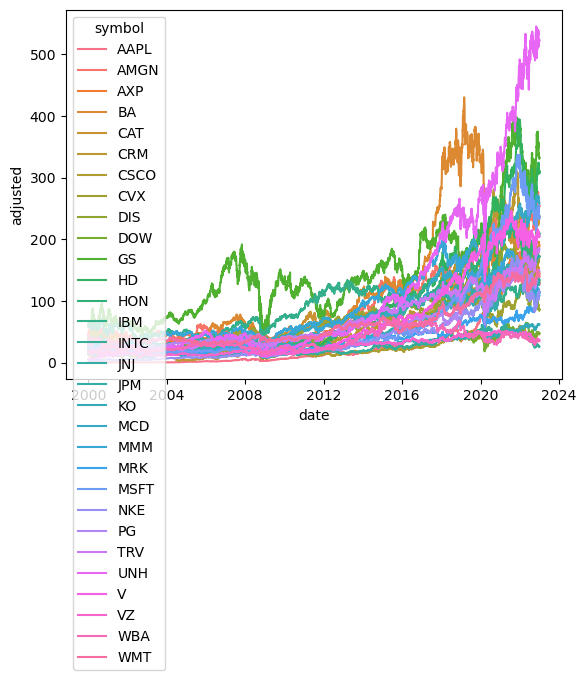

In [46]:
sns.lineplot(index_prices, x = "date", y = "adjusted", hue = "symbol")

In [44]:
all_returns = (index_prices
  .assign(ret = lambda x: x.groupby("symbol")["adjusted"].pct_change())
  .get(["symbol", "date", "ret"])
  .dropna(subset="ret")
)

(all_returns
  .groupby("symbol")["ret"]
  .describe()
  .round(3)
)

,count,mean,std,min,25%,50%,75%,max
symbol,,,,,,,,
AAPL,5786.0,0.001,0.025,-0.519,-0.010,0.001,0.013,0.139
AMGN,5786.0,0.000,0.020,-0.134,-0.009,0.000,0.009,0.151
AXP,5786.0,0.001,0.023,-0.176,-0.009,0.000,0.010,0.219
BA,5786.0,0.001,0.022,-0.238,-0.010,0.001,0.011,0.243
CAT,5786.0,0.001,0.020,-0.145,-0.010,0.001,0.011,0.147
CRM,4664.0,0.001,0.027,-0.271,-0.012,0.000,0.014,0.260
CSCO,5786.0,0.000,0.024,-0.162,-0.009,0.000,0.010,0.244
CVX,5786.0,0.001,0.018,-0.221,-0.008,0.001,0.009,0.227
DIS,5786.0,0.000,0.019,-0.184,-0.009,0.000,0.009,0.160


### Aggregate trading data

In [47]:
trading_volume = (index_prices
  .assign(trading_volume = lambda x: (x["volume"] * x["adjusted"]) / 1e9)
  .groupby("date")["trading_volume"]
  .sum()
  .reset_index()
  .assign(trading_volume_lag = lambda x: x["trading_volume"].shift())
)
trading_volume = trading_volume.dropna()

<Axes: xlabel='date', ylabel='trading_volume'>

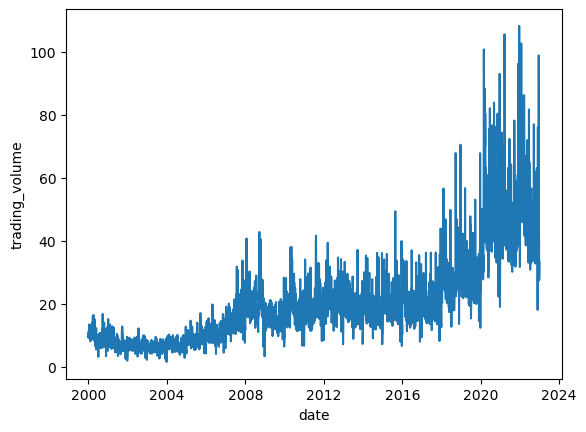

In [53]:
sns.lineplot(trading_volume,x = "date", y = "trading_volume")